In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

In [2]:
sns.set()

In [9]:
def dalla_man(t, u, p, D):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = u
    k1, k2, kp1, kp2, kp3, ke1, ke2, m1, m2, m4, m6, ka1, ka2, kd, ki, kgri, kmin, kmax, a, b, c, d, kabs, Vm0, Km0, Vmx, Kmx, p2U, Ib, VI, f, BW, Fcns = p

    delta = 0.01 * np.random.randn()

    dx1 = kp1 - Fcns - k1 * x1 + k2 * x2 - kp2 * x1 - kp3 * x6 + ke1 * (ke2 - x1) + (f * kabs * x9) / BW
    dx2 = k1 * x1 - k2 * x2 - (x2 * (Vm0 + Vmx * x10)) / (Km0 + x2 + Kmx * x10)
    dx3 = m2 * x4 - x3 * (m1 - (m1 * m6) / (m6 - 1))
    dx4 = ka1 * x11 - x4 * (m2 + m4) + ka2 * x12 + m1 * x3
    dx5 = -ki * (x5 - (x4 / VI))
    dx6 = ki * (x5 - x6)
    dx7 = -kgri * x7 + D * delta
    dx8 = kgri * x7 - x8 * (kmin + ((kmax - kmin) / 2) * (np.tanh(a * (x7 + x8 - b * D)) - np.tanh(c * (x7 + x8 - d * D)) + 2))
    dx9 = x8 * (kmin + ((kmax - kmin) / 2) * (np.tanh(a * (x7 + x8 - b * D)) - np.tanh(c * (x7 + x8 - d * D)) + 2)) - kabs * x9
    dx10 = -p2U * (Ib - (x4 / VI)) - p2U * x10
    dx11 = 0.8 - x11 * (ka1 + kd)
    dx12 = kd * x11 - ka2 * x12

    return [dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dx10, dx11, dx12]

In [10]:
# nominal parameters
k1 = 0.065
k2 = 0.079
kp1 = 2.70
kp2 = 0.0021
kp3 = 0.009
ke1 = 0.0005
ke2 = 339
m1 = 0.190
m2 = 0.484
m4 = 0.194
m6 = 0.6471
ka1 = 0
ka2 = 0
kd = 0
ki = 0.0079
kgri = 0.0558
kmin = 0.0080
kmax = 0.0558
a = 0.00013
b = 0.82
c = 0.00236
d = 0.010
kabs = 0.057
Vm0 = 2.50
Km0 = 225.59
Vmx = 0.047
Kmx = 2.30
p2U = 0.0331
Ib = 25.49
VI = 0.05
f = 0.9
BW = 70
Fcns = 1.0

p = [k1, k2, kp1, kp2, kp3, ke1, ke2, m1, m2, m4, m6, ka1, ka2, kd, ki, kgri, kmin, kmax, a, b, c, d, kabs, Vm0, Km0, Vmx, Kmx, p2U, Ib, VI, f, BW, Fcns]

In [11]:
# more parameters
HEb = 0.6
Vg = 1.88

# basal conditions
Gb = 130
Sb = 0
IIRb = 0
m3 = HEb * m1 / (1 - HEb)
Ipb = IIRb / (m2 + m4 - (m1 * m2) / (m1 + m3))
Ilb = Ipb * (m2 / (m1 + m3))
Ib = Ipb / VI
Ipob = 0
EGPb = 2.4
Gpb = Gb * Vg
Gtb = (Fcns - EGPb + k1 * Gpb) / k2
Isc1ss = 0 # IIRb / (kd + ka1)
Isc2ss = 0 # kd * Isc1ss / ka2

In [12]:
# initial conditions
Gp0 = Gpb
Gt0 = Gtb
Il0 = Ilb
Ip0 = Ipb
I10 = Ib
Id0 = Ib
Qsto10 = 0
Qsto20 = 0
Qgut0 = 0
X0 = 0
Isc10 = Isc1ss
Isc20 = Isc2ss

u0 = [Gp0, Gt0, Il0, Ip0, I10, Id0, Qsto10, Qsto20, Qgut0, X0, Isc10, Isc20]

In [22]:
# timespan
t_span = (0, 60 * 60 * 24)
t_eval = np.arange(*t_span)

In [25]:
D = 50
sol = solve_ivp(dalla_man, t_span, u0, t_eval=t_eval, args=(p, D))

KeyboardInterrupt: 

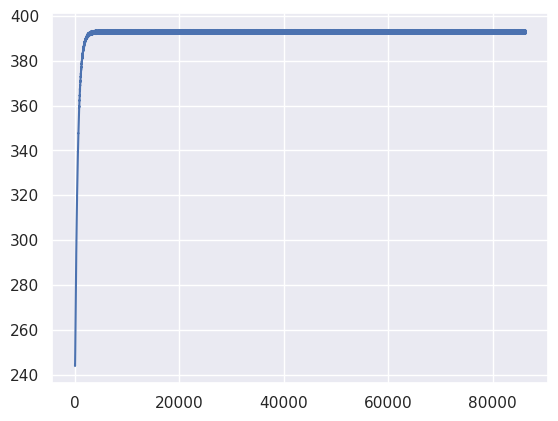

In [ ]:
plt.plot(sol.t, sol.y[0, :])
plt.show()